In [57]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
url="http://ist.gmu.edu/~hpurohit/courses/ait582-proj-data-spring16.json"
content = requests.get(url).content

In [2]:
data=pd.read_json(content)
df = pd.DataFrame(data)
df = df.iloc[1:]

# MILESTONE 1

In [3]:
df.head()

,CUSTOMERID,DESCRIPTION,FARE,GUESTS,SEATCLASS,SUCCESS
1,1,"Braund, Mr. Owen Harris;22",7.25,1,3,0
2,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,1,1,1
3,3,"Heikkinen, Miss. Laina;26",7.925,0,3,1
4,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel);35",53.1,1,1,1
5,5,"Allen, Mr. William Henry;35",8.05,0,3,0


In [4]:
df.to_csv('data.csv')

In [5]:
#Breaking down the Description column into attributes.
df['Last_Name'], df['end'] = zip(*df['DESCRIPTION'].map(lambda x: x.split(',')))
df['Title'], df['end'] = zip(*df['end'].map(lambda x: x.split('.')))
df[['First_Name','Age']] = df['end'].str.split(';',expand=True)
df['Alternate_Name'] = df['First_Name'].str.extract(r"\((.*?)\)", expand=False)
df['First_Name'] = df['First_Name'].str.replace(r"\((.*?)\)"," ")


In [6]:
df = df.drop('DESCRIPTION', 1)
df = df.drop('end', 1)

In [7]:
df.head()

,CUSTOMERID,FARE,GUESTS,SEATCLASS,SUCCESS,Last_Name,Title,First_Name,Age,Alternate_Name
1,1,7.25,1,3,0,Braund,Mr,Owen Harris,22,NaN
2,2,71.2833,1,1,1,Cumings,Mrs,John Bradley,38,Florence Briggs Thayer
3,3,7.925,0,3,1,Heikkinen,Miss,Laina,26,NaN
4,4,53.1,1,1,1,Futrelle,Mrs,Jacques Heath,35,Lily May Peel
5,5,8.05,0,3,0,Allen,Mr,William Henry,35,NaN


# Milestone 2

In [8]:
#Imputing null values in Age column. We can't impute the Age column with mean directly because it might be inaccurate. 
#For example, a child with an Age of 10 may be replaced by the average age of 29
#We use the title (Mr, Miss, Master ) to distinguish among the ages and impute them respectively.
df['Age'] = pd.to_numeric(df['Age'])
df['Age'] = df['Age'].replace(to_replace='', value='NaN', regex=True)

In [9]:
df.groupby('Title')['Age'].count()

Title
 Capt              1
 Col               2
 Don               1
 Dr                6
 Jonkheer          1
 Lady              1
 Major             2
 Master           36
 Miss            146
 Mlle              2
 Mme               1
 Mr              398
 Mrs             107
 Ms                1
 Rev               6
 Sir               1
 the Countess      1
Name: Age, dtype: int64

In [10]:
df.groupby('Title')['Age'].mean()

Title
 Capt            70.000000
 Col             58.000000
 Don             40.000000
 Dr              42.000000
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master           4.472222
 Miss            21.753425
 Mlle            24.000000
 Mme             24.000000
 Mr              32.349246
 Mrs             35.728972
 Ms              28.000000
 Rev             43.166667
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

In [11]:
df.loc[(df.Age.isnull())&(df.Title==" Mr"),'Age']=33
df.loc[(df.Age.isnull())&(df.Title==' Mrs'),'Age']=36
df.loc[(df.Age.isnull())&(df.Title==' Master'),'Age']=5
df.loc[(df.Age.isnull())&(df.Title==' Miss'),'Age']=22
df.loc[(df.Age.isnull())&(df.Title==' Capt'),'Age']=70
df.loc[(df.Age.isnull())&(df.Title==' Col'),'Age']=58
df.loc[(df.Age.isnull())&(df.Title==' Don'),'Age']=40
df.loc[(df.Age.isnull())&(df.Title==' Dr'),'Age']=42
df.loc[(df.Age.isnull())&(df.Title==' Jonkheer'),'Age']=38
df.loc[(df.Age.isnull())&(df.Title==' Lady'),'Age']=48
df.loc[(df.Age.isnull())&(df.Title==' Major'),'Age']=49
df.loc[(df.Age.isnull())&(df.Title==' Mlle'),'Age']=24
df.loc[(df.Age.isnull())&(df.Title==' Mme'),'Age']=24
df.loc[(df.Age.isnull())&(df.Title==' Rev'),'Age']=44
df.loc[(df.Age.isnull())&(df.Title==' Sir'),'Age']=49
df.loc[(df.Age.isnull())&(df.Title==' the Countess'),'Age']=33

In [12]:
#Checking for null values after imputation. If the output is False, there are no null values
df.Age.isnull().any()


False

In [13]:
df.to_csv('data_582.csv',index=False)

In [14]:
pd.read_csv('data_582.csv')

,CUSTOMERID,FARE,GUESTS,SEATCLASS,SUCCESS,Last_Name,Title,First_Name,Age,Alternate_Name
0,1,7.2500,1,3,0,Braund,Mr,Owen Harris,22.0,NaN
1,2,71.2833,1,1,1,Cumings,Mrs,John Bradley,38.0,Florence Briggs Thayer
2,3,7.9250,0,3,1,Heikkinen,Miss,Laina,26.0,NaN
3,4,53.1000,1,1,1,Futrelle,Mrs,Jacques Heath,35.0,Lily May Peel
4,5,8.0500,0,3,0,Allen,Mr,William Henry,35.0,NaN
5,6,8.4583,0,3,0,Moran,Mr,James,33.0,NaN
6,7,51.8625,0,1,0,McCarthy,Mr,Timothy J,54.0,NaN
7,8,21.0750,3,3,0,Palsson,Master,Gosta Leonard,2.0,NaN
8,9,11.1333,0,3,1,Johnson,Mrs,Oscar W,27.0,Elisabeth Vilhelmina Berg
9,10,30.0708,1,2,1,Nasser,Mrs,Nicholas,14.0,Adele Achem


In [15]:
df.Age = df.Age.astype(int)
df.SUCCESS = df.SUCCESS.astype(int)
df.FARE = df.FARE.astype(float)
df.GUESTS = df.GUESTS.astype(int)
df.SEATCLASS = df.SEATCLASS.astype(int)
df.First_Name = df.First_Name.astype(str)
df.Last_Name = df.Last_Name.astype(str)
df.Alternate_Name = df.Alternate_Name.astype(str)


In [73]:
df.head()

,CUSTOMERID,FARE,GUESTS,SEATCLASS,SUCCESS,Last_Name,Title,First_Name,Age,Alternate_Name,ethnicity,ethni
1,1,7.2500,1,3,0,Braund,Mr,Owen Harris,22,nan,english,5.0
2,2,71.2833,1,1,1,Cumings,Mrs,John Bradley,38,Florence Briggs Thayer,nordic,17.0
3,3,7.9250,0,3,1,Heikkinen,Miss,Laina,26,nan,french,6.0
4,4,53.1000,1,1,1,Futrelle,Mrs,Jacques Heath,35,Lily May Peel,english,5.0
5,5,8.0500,0,3,0,Allen,Mr,William Henry,35,nan,english,5.0


# Milestone 3

In [ ]:
#Converting Last Names into list to get callbacks from API
last_List = df['Last_Name'].tolist()
first_List = df['First_Name'].tolist()

In [ ]:
last_List[0]

In [ ]:
import requests
out = []

url = 'http://abel.ischool.illinois.edu/cgi-bin/coethnea/search.py?'
# names = ['gade','lol','dond']
for i in range(0,len(df)):
    header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
    }

    r = requests.get(str(url+"Fname="+first_List[i]+"&Lname="+last_List[i]), headers=header)

    dfs = pd.read_html(r.text)
    out.append(dfs[0][0][1])

In [ ]:
out
df['ethnicity'] = pd.DataFrame(out)
df.head()

In [ ]:
df.groupby('ethnicity')['Age'].mean()

In [ ]:
df.loc[(df.ethnicity=="african"),'ethni']=0
df.loc[(df.ethnicity=="arab"),'ethni']=1
df.loc[(df.ethnicity=="baltic"),'ethni']=2
df.loc[(df.ethnicity=="chinese"),'ethni']=3
df.loc[(df.ethnicity=="dutch"),'ethni']=4
df.loc[(df.ethnicity=="english"),'ethni']=5
df.loc[(df.ethnicity=="french"),'ethni']=6
df.loc[(df.ethnicity=="german"),'ethni']=7
df.loc[(df.ethnicity=="greek"),'ethni']=8
df.loc[(df.ethnicity=="hispanic"),'ethni']=9
df.loc[(df.ethnicity=="hungarian"),'ethni']=10
df.loc[(df.ethnicity=="indian"),'ethni']=11
df.loc[(df.ethnicity=="indonesian"),'ethni']=12
df.loc[(df.ethnicity=="israeli"),'ethni']=13
df.loc[(df.ethnicity=="italian"),'ethni']=14
df.loc[(df.ethnicity=="japanese"),'ethni']=15
df.loc[(df.ethnicity=="korean"),'ethni']=16
df.loc[(df.ethnicity=="nordic"),'ethni']=17
df.loc[(df.ethnicity=="romanian"),'ethni']=18
df.loc[(df.ethnicity=="slav"),'ethni']=19
df.loc[(df.ethnicity=="thai"),'ethni']=20
df.loc[(df.ethnicity=="turkish"),'ethni']=21


In [ ]:
df
df.to_csv('data_latest.csv')

# Milestone 3

In [75]:
viz = pd.read_csv('data2.csv')
viz =pd.DataFrame(viz)
viz.head()

,FARE,GUESTS,SEATCLASS,SUCCESS,Age,has_alternate_name,ethnicity
0,7.2500,1,3,0,22,0,5
1,71.2833,1,1,1,38,1,17
2,7.9250,0,3,1,26,0,6
3,53.1000,1,1,1,35,1,5
4,8.0500,0,3,0,35,0,5


# Distribution of Fare by Age

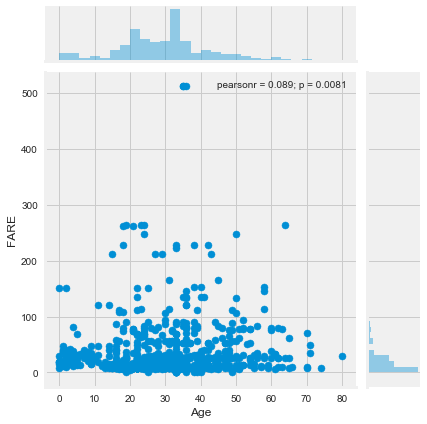

In [76]:
sns.jointplot(x='Age', y='FARE', data=viz)

# Distribution of Fare with respect to Age, Grouped by SUCCESS

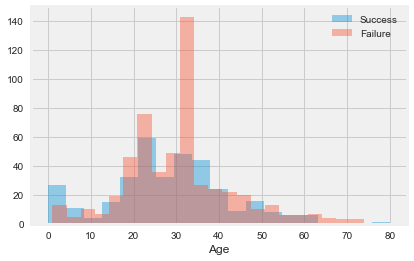

In [77]:
#One more variation of Age visualization
success = viz[viz["SUCCESS"] == 1].drop(['SUCCESS'], axis = 1)
not_success = viz[viz["SUCCESS"] == 0].drop(['SUCCESS'], axis = 1)
sns.distplot(success.Age, label = 'Success', hist = True, kde = False)
sns.distplot(not_success.Age, label = 'Failure', hist = True, kde = False)
plt.legend()

# Countplot of customers with respect to number of GUESTS

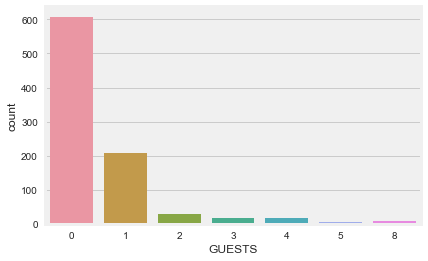

In [78]:
sns.countplot(x='GUESTS',data=viz)
#This graph indicates that the maximum number of customers have 0 guests, around 200 customers with 1 guest etc...

# Countplot of Customers with respect to SUCCESS

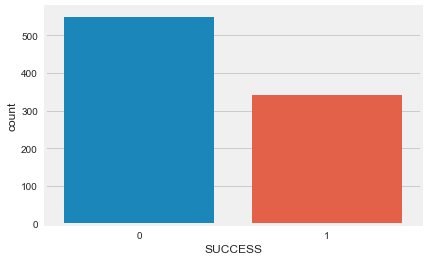

In [79]:
sns.countplot(x='SUCCESS',data=viz)

# Jointplot of customers with respect to FARE, grouped by SEATCLASS

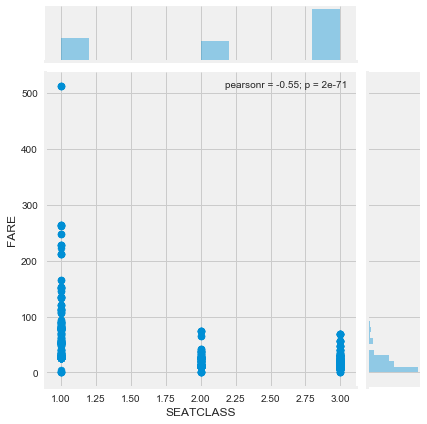

In [80]:
sns.jointplot(x='SEATCLASS',y='FARE',data=viz)
#This indicates that the SEATCLASS 1 indicates a higher class, whereas SEATCLASS 3 indicates a lower class
#since the fares are lower for class 3

# Countplot of customers with respect to SEATCLASS

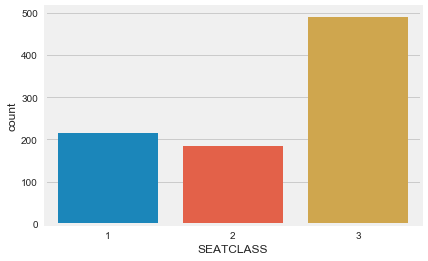

In [81]:
sns.countplot(x='SEATCLASS',data=viz)

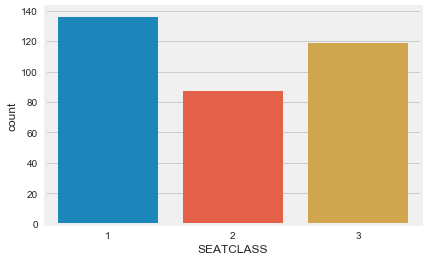

In [82]:
sns.countplot(x='SEATCLASS',data=success)
#This indicates the number of customers with SUCCESS grouped by SEATCLASS

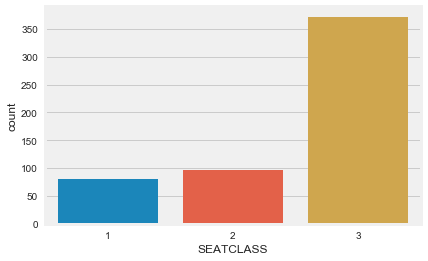

In [83]:
sns.countplot(x='SEATCLASS',data=not_success)
#This indicates the number of customers WITHOUT SUCCESS grouped by SEATCLASS
#SEATCLASS 3 has most number of customers with SUCCESS as 0 (or Failure)

# Correlation plot of all the features

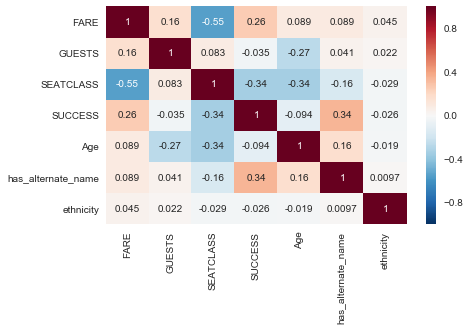

In [84]:
sns.heatmap(viz.corr(),annot = True)

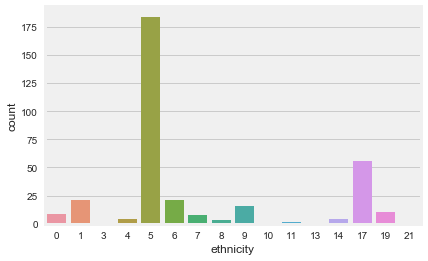

In [86]:
sns.countplot(x='ethnicity',data=success)
# 5 indicates the ethnicity - English, which has the highest number of success rate

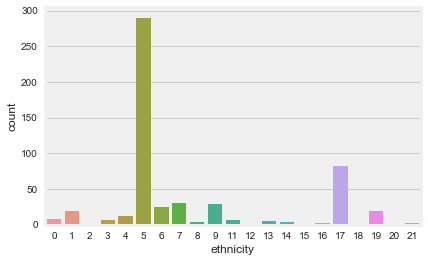

In [87]:
sns.countplot(x='ethnicity',data=not_success)

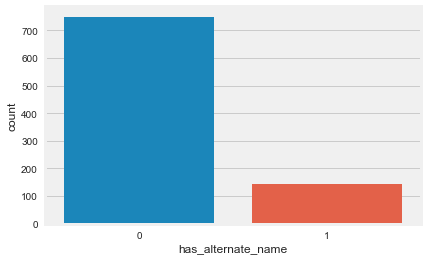

In [90]:
sns.countplot(x='has_alternate_name',data=viz)
#0 indicates people with no alias
#1 indicates people with alias

# Milestone 4

# Attribute selector


=== Run information ===

Evaluator:    weka.attributeSelection.CfsSubsetEval -P 1 -E 1
Search:       weka.attributeSelection.BestFirst -D 1 -N 5
Relation:     data2-weka.filters.AllFilter-weka.filters.MultiFilter-Fweka.filters.AllFilter-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last
Instances:    891
Attributes:   7
              FARE
              GUESTS
              SEATCLASS
              SUCCESS
              Age
              has_alternate_name
              ethnicity
Evaluation mode:    evaluate on all training data



=== Attribute Selection on all input data ===

Search Method:
	Best first.
	Start set: no attributes
	Search direction: forward
	Stale search after 5 node expansions
	Total number of subsets evaluated: 29
	Merit of best subset found:    0.127

Attribute Subset Evaluator (supervised, Class (nominal): 4 SUCCESS):
	CFS Subset Evaluator
	Including locally predictive attributes

Selected attributes: 1,3,6 : 3
                     FARE
                     SEATCLASS
                     has_alternate_name



In [ ]:
=== Run information ===

Evaluator:    weka.attributeSelection.CfsSubsetEval -P 1 -E 1
Search:       weka.attributeSelection.BestFirst -D 1 -N 5
Relation:     data2-weka.filters.AllFilter-weka.filters.MultiFilter-Fweka.filters.AllFilter-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last
Instances:    891
Attributes:   7
              FARE
              GUESTS
              SEATCLASS
              SUCCESS
              Age
              has_alternate_name
              ethnicity
Evaluation mode:    10-fold cross-validation



=== Attribute selection 10 fold cross-validation (stratified), seed: 1 ===

number of folds (%)  attribute
          10(100 %)   1 FARE
           0(  0 %)   2 GUESTS
          10(100 %)   3 SEATCLASS
           0(  0 %)   5 Age
          10(100 %)   6 has_alternate_name
           0(  0 %)   7 ethnicity



# Milestone 5

# J48



=== Run information ===

Scheme:       weka.classifiers.trees.J48 -C 0.25 -M 2
Relation:     data2-weka.filters.AllFilter-weka.filters.MultiFilter-Fweka.filters.AllFilter-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.NumericToNominal-Rfirst-last-weka.filters.unsupervised.attribute.Discretize-B10-M-1.0-Rfirst-last
Instances:    891
Attributes:   7
              FARE
              GUESTS
              SEATCLASS
              SUCCESS
              Age
              has_alternate_name
              ethnicity
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===

J48 pruned tree
------------------

has_alternate_name = '(-inf-0.1]'
|   FARE = '(-inf-51.23292]'
|   |   Age = '(-inf-8]'
|   |   |   GUESTS = '(-inf-0.8]': '(0.9-inf)' (12.0/1.0)
|   |   |   GUESTS = '(0.8-1.6]': '(0.9-inf)' (16.0)
|   |   |   GUESTS = '(1.6-2.4]': '(0.9-inf)' (5.0)
|   |   |   GUESTS = '(2.4-3.2]': '(-inf-0.1]' (6.0)
|   |   |   GUESTS = '(3.2-4]': '(-inf-0.1]' (12.0/2.0)
|   |   |   GUESTS = '(4-4.8]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(4.8-5.6]': '(-inf-0.1]' (1.0)
|   |   |   GUESTS = '(5.6-6.4]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(6.4-7.2]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(7.2-inf)': '(0.9-inf)' (0.0)
|   |   Age = '(8-16]': '(-inf-0.1]' (39.0/12.0)
|   |   Age = '(16-24]'
|   |   |   SEATCLASS = '(-inf-1.2]': '(0.9-inf)' (3.0)
|   |   |   SEATCLASS = '(1.2-1.4]': '(-inf-0.1]' (0.0)
|   |   |   SEATCLASS = '(1.4-1.6]': '(-inf-0.1]' (0.0)
|   |   |   SEATCLASS = '(1.6-1.8]': '(-inf-0.1]' (0.0)
|   |   |   SEATCLASS = '(1.8-2]': '(-inf-0.1]' (24.0/9.0)
|   |   |   SEATCLASS = '(2-2.2]': '(-inf-0.1]' (0.0)
|   |   |   SEATCLASS = '(2.2-2.4]': '(-inf-0.1]' (0.0)
|   |   |   SEATCLASS = '(2.4-2.6]': '(-inf-0.1]' (0.0)
|   |   |   SEATCLASS = '(2.6-2.8]': '(-inf-0.1]' (0.0)
|   |   |   SEATCLASS = '(2.8-inf)': '(-inf-0.1]' (133.0/37.0)
|   |   Age = '(24-32]': '(-inf-0.1]' (120.0/33.0)
|   |   Age = '(32-40]': '(-inf-0.1]' (178.0/22.0)
|   |   Age = '(40-48]': '(-inf-0.1]' (37.0/6.0)
|   |   Age = '(48-56]': '(-inf-0.1]' (22.0/5.0)
|   |   Age = '(56-64]': '(-inf-0.1]' (14.0/2.0)
|   |   Age = '(64-72]': '(-inf-0.1]' (7.0)
|   |   Age = '(72-inf)': '(-inf-0.1]' (2.0/1.0)
|   FARE = '(51.23292-102.46584]'
|   |   GUESTS = '(-inf-0.8]'
|   |   |   Age = '(-inf-8]': '(0.9-inf)' (1.0)
|   |   |   Age = '(8-16]': '(0.9-inf)' (2.0)
|   |   |   Age = '(16-24]'
|   |   |   |   SEATCLASS = '(-inf-1.2]': '(0.9-inf)' (9.0/2.0)
|   |   |   |   SEATCLASS = '(1.2-1.4]': '(0.9-inf)' (0.0)
|   |   |   |   SEATCLASS = '(1.4-1.6]': '(0.9-inf)' (0.0)
|   |   |   |   SEATCLASS = '(1.6-1.8]': '(0.9-inf)' (0.0)
|   |   |   |   SEATCLASS = '(1.8-2]': '(-inf-0.1]' (2.0)
|   |   |   |   SEATCLASS = '(2-2.2]': '(0.9-inf)' (0.0)
|   |   |   |   SEATCLASS = '(2.2-2.4]': '(0.9-inf)' (0.0)
|   |   |   |   SEATCLASS = '(2.4-2.6]': '(0.9-inf)' (0.0)
|   |   |   |   SEATCLASS = '(2.6-2.8]': '(0.9-inf)' (0.0)
|   |   |   |   SEATCLASS = '(2.8-inf)': '(0.9-inf)' (0.0)
|   |   |   Age = '(24-32]': '(0.9-inf)' (10.0/1.0)
|   |   |   Age = '(32-40]': '(0.9-inf)' (7.0/2.0)
|   |   |   Age = '(40-48]': '(-inf-0.1]' (2.0)
|   |   |   Age = '(48-56]': '(-inf-0.1]' (3.0)
|   |   |   Age = '(56-64]': '(0.9-inf)' (0.0)
|   |   |   Age = '(64-72]': '(-inf-0.1]' (1.0)
|   |   |   Age = '(72-inf)': '(0.9-inf)' (0.0)
|   |   GUESTS = '(0.8-1.6]': '(0.9-inf)' (29.0/12.0)
|   |   GUESTS = '(1.6-2.4]': '(-inf-0.1]' (4.0)
|   |   GUESTS = '(2.4-3.2]': '(0.9-inf)' (0.0)
|   |   GUESTS = '(3.2-4]': '(0.9-inf)' (0.0)
|   |   GUESTS = '(4-4.8]': '(0.9-inf)' (0.0)
|   |   GUESTS = '(4.8-5.6]': '(0.9-inf)' (0.0)
|   |   GUESTS = '(5.6-6.4]': '(0.9-inf)' (0.0)
|   |   GUESTS = '(6.4-7.2]': '(0.9-inf)' (0.0)
|   |   GUESTS = '(7.2-inf)': '(-inf-0.1]' (7.0)
|   FARE = '(102.46584-153.69876]': '(0.9-inf)' (23.0/7.0)
|   FARE = '(153.69876-204.93168]': '(0.9-inf)' (1.0)
|   FARE = '(204.93168-256.1646]'
|   |   ethnicity = 0: '(-inf-0.1]' (0.0)
|   |   ethnicity = 1: '(0.9-inf)' (2.0)
|   |   ethnicity = 2: '(-inf-0.1]' (0.0)
|   |   ethnicity = 3: '(-inf-0.1]' (0.0)
|   |   ethnicity = 4: '(-inf-0.1]' (0.0)
|   |   ethnicity = 5: '(0.9-inf)' (2.0)
|   |   ethnicity = 6: '(-inf-0.1]' (0.0)
|   |   ethnicity = 7: '(-inf-0.1]' (1.0)
|   |   ethnicity = 8: '(-inf-0.1]' (0.0)
|   |   ethnicity = 9: '(-inf-0.1]' (1.0)
|   |   ethnicity = 10: '(-inf-0.1]' (0.0)
|   |   ethnicity = 11: '(-inf-0.1]' (0.0)
|   |   ethnicity = 12: '(-inf-0.1]' (0.0)
|   |   ethnicity = 13: '(-inf-0.1]' (0.0)
|   |   ethnicity = 14: '(-inf-0.1]' (0.0)
|   |   ethnicity = 15: '(-inf-0.1]' (0.0)
|   |   ethnicity = 16: '(-inf-0.1]' (0.0)
|   |   ethnicity = 17: '(-inf-0.1]' (2.0)
|   |   ethnicity = 18: '(-inf-0.1]' (0.0)
|   |   ethnicity = 19: '(-inf-0.1]' (0.0)
|   |   ethnicity = 20: '(-inf-0.1]' (0.0)
|   |   ethnicity = 21: '(-inf-0.1]' (0.0)
|   FARE = '(256.1646-307.39752]': '(0.9-inf)' (6.0/2.0)
|   FARE = '(307.39752-358.63044]': '(-inf-0.1]' (0.0)
|   FARE = '(358.63044-409.86336]': '(-inf-0.1]' (0.0)
|   FARE = '(409.86336-461.09628]': '(-inf-0.1]' (0.0)
|   FARE = '(461.09628-inf)': '(0.9-inf)' (3.0)
has_alternate_name = '(0.1-0.2]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.2-0.3]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.3-0.4]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.4-0.5]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.5-0.6]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.6-0.7]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.7-0.8]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.8-0.9]': '(-inf-0.1]' (0.0)
has_alternate_name = '(0.9-inf)'
|   SEATCLASS = '(-inf-1.2]': '(0.9-inf)' (49.0/1.0)
|   SEATCLASS = '(1.2-1.4]': '(0.9-inf)' (0.0)
|   SEATCLASS = '(1.4-1.6]': '(0.9-inf)' (0.0)
|   SEATCLASS = '(1.6-1.8]': '(0.9-inf)' (0.0)
|   SEATCLASS = '(1.8-2]': '(0.9-inf)' (44.0/7.0)
|   SEATCLASS = '(2-2.2]': '(0.9-inf)' (0.0)
|   SEATCLASS = '(2.2-2.4]': '(0.9-inf)' (0.0)
|   SEATCLASS = '(2.4-2.6]': '(0.9-inf)' (0.0)
|   SEATCLASS = '(2.6-2.8]': '(0.9-inf)' (0.0)
|   SEATCLASS = '(2.8-inf)'
|   |   Age = '(-inf-8]': '(0.9-inf)' (2.0)
|   |   Age = '(8-16]': '(0.9-inf)' (1.0)
|   |   Age = '(16-24]': '(0.9-inf)' (8.0/3.0)
|   |   Age = '(24-32]': '(-inf-0.1]' (14.0/6.0)
|   |   Age = '(32-40]'
|   |   |   GUESTS = '(-inf-0.8]': '(-inf-0.1]' (6.0/2.0)
|   |   |   GUESTS = '(0.8-1.6]': '(0.9-inf)' (9.0/3.0)
|   |   |   GUESTS = '(1.6-2.4]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(2.4-3.2]': '(0.9-inf)' (1.0)
|   |   |   GUESTS = '(3.2-4]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(4-4.8]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(4.8-5.6]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(5.6-6.4]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(6.4-7.2]': '(0.9-inf)' (0.0)
|   |   |   GUESTS = '(7.2-inf)': '(0.9-inf)' (0.0)
|   |   Age = '(40-48]': '(-inf-0.1]' (7.0)
|   |   Age = '(48-56]': '(-inf-0.1]' (0.0)
|   |   Age = '(56-64]': '(0.9-inf)' (1.0)
|   |   Age = '(64-72]': '(-inf-0.1]' (0.0)
|   |   Age = '(72-inf)': '(-inf-0.1]' (0.0)

Number of Leaves  : 	121

Size of the tree : 	133


Time taken to build model: 0.01 seconds

=== Stratified cross-validation ===
=== Summary ===

Correctly Classified Instances         678               76.0943 %
Incorrectly Classified Instances       213               23.9057 %
Kappa statistic                          0.4691
Mean absolute error                      0.0661
Root mean squared error                  0.188 
Relative absolute error                 69.1136 %
Root relative squared error             86.4179 %
Total Number of Instances              891     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.885    0.439    0.764      0.885    0.820      0.481    0.765     0.803     '(-inf-0.1]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.1-0.2]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.2-0.3]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.3-0.4]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.4-0.5]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.5-0.6]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.6-0.7]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.7-0.8]'
                 0.000    0.000    0.000      0.000    0.000      0.000    ?         ?         '(0.8-0.9]'
                 0.561    0.115    0.753      0.561    0.643      0.481    0.765     0.710     '(0.9-inf)'
Weighted Avg.    0.761    0.314    0.760      0.761    0.752      0.481    0.765     0.767     

=== Confusion Matrix ===

   a   b   c   d   e   f   g   h   i   j   <-- classified as
 486   0   0   0   0   0   0   0   0  63 |   a = '(-inf-0.1]'
   0   0   0   0   0   0   0   0   0   0 |   b = '(0.1-0.2]'
   0   0   0   0   0   0   0   0   0   0 |   c = '(0.2-0.3]'
   0   0   0   0   0   0   0   0   0   0 |   d = '(0.3-0.4]'
   0   0   0   0   0   0   0   0   0   0 |   e = '(0.4-0.5]'
   0   0   0   0   0   0   0   0   0   0 |   f = '(0.5-0.6]'
   0   0   0   0   0   0   0   0   0   0 |   g = '(0.6-0.7]'
   0   0   0   0   0   0   0   0   0   0 |   h = '(0.7-0.8]'
   0   0   0   0   0   0   0   0   0   0 |   i = '(0.8-0.9]'
 150   0   0   0   0   0   0   0   0 192 |   j = '(0.9-inf)'



# Random Tree


=== Run information ===

Scheme:       weka.classifiers.trees.RandomTree -K 0 -M 1.0 -V 0.001 -S 1
Relation:     data2
Instances:    891
Attributes:   7
              FARE
              GUESTS
              SEATCLASS
              SUCCESS
              Age
              has_alternate_name
              ethnicity
Test mode:    10-fold cross-validation

=== Classifier model (full training set) ===


RandomTree
==========

SEATCLASS < 2.5
|   has_alternate_name < 0.5
|   |   FARE < 52.28
|   |   |   Age < 14.5 : 1 (18/0)
|   |   |   Age >= 14.5
|   |   |   |   Age < 22.5
|   |   |   |   |   SEATCLASS < 1.5 : 1 (4/0)
|   |   |   |   |   SEATCLASS >= 1.5
|   |   |   |   |   |   Age < 21.5
|   |   |   |   |   |   |   FARE < 24.5
|   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   ethnicity < 13
|   |   |   |   |   |   |   |   |   |   Age < 20
|   |   |   |   |   |   |   |   |   |   |   FARE < 11.75
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 6
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 11 : 0.5 (2/0.25)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 11 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 6 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 11.75
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 5.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 5.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 20 : 1 (1/0)
|   |   |   |   |   |   |   |   |   ethnicity >= 13
|   |   |   |   |   |   |   |   |   |   Age < 18.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   Age >= 18.5 : 0 (1/0)
|   |   |   |   |   |   |   |   GUESTS >= 0.5 : 0 (1/0)
|   |   |   |   |   |   |   FARE >= 24.5 : 0 (2/0)
|   |   |   |   |   |   Age >= 21.5 : 1 (2/0)
|   |   |   |   Age >= 22.5
|   |   |   |   |   FARE < 7.75 : 0 (12/0)
|   |   |   |   |   FARE >= 7.75
|   |   |   |   |   |   ethnicity < 0.5
|   |   |   |   |   |   |   Age < 29 : 1 (1/0)
|   |   |   |   |   |   |   Age >= 29
|   |   |   |   |   |   |   |   FARE < 31.75 : 1 (1/0)
|   |   |   |   |   |   |   |   FARE >= 31.75 : 0 (1/0)
|   |   |   |   |   |   ethnicity >= 0.5
|   |   |   |   |   |   |   FARE < 36.25
|   |   |   |   |   |   |   |   FARE < 29.85
|   |   |   |   |   |   |   |   |   FARE < 26.77
|   |   |   |   |   |   |   |   |   |   FARE < 26.27
|   |   |   |   |   |   |   |   |   |   |   FARE < 13.93
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 5.5
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 13.68
|   |   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 4.5 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 4.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 11
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 41
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 27.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 26.5 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 26.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 27.5 : 0 (4/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 41 : 1 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 11
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 29
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 24.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 23.5 : 0 (4/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 23.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 24.5 : 0 (5/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 29
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 12.76
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 40.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 40.5 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 12.76
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 46.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 13.25
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 37
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 30.5 : 0.33 (3/0.22)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 30.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 33 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 33 : 0.5 (6/0.25)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 37
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 39.5 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 39.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 41 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 41 : 0.5 (2/0.25)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 13.25 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 46.5 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 13.68 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 5.5
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 12.94 : 0 (6/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 12.94
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 26.5 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 26.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 40 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 40 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 13.93
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 6
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 4.5 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 4.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 39.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 30.5 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 30.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 33.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 33.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 23.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 23.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 39.5 : 0 (7/0)
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 6 : 0 (9/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 26.27
|   |   |   |   |   |   |   |   |   |   |   Age < 59
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 7.5
|   |   |   |   |   |   |   |   |   |   |   |   |   Age < 43.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 26.42 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 26.42
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 30.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 30.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 33.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 33.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 43.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 5.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 52 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 52
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 57 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 57 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 5.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 7.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   Age >= 59 : 0 (4/0)
|   |   |   |   |   |   |   |   |   FARE >= 26.77
|   |   |   |   |   |   |   |   |   |   FARE < 29.21 : 0 (9/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 29.21
|   |   |   |   |   |   |   |   |   |   |   Age < 35 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   Age >= 35 : 0 (2/0)
|   |   |   |   |   |   |   |   FARE >= 29.85
|   |   |   |   |   |   |   |   |   Age < 27.5 : 1 (3/0)
|   |   |   |   |   |   |   |   |   Age >= 27.5
|   |   |   |   |   |   |   |   |   |   SEATCLASS < 1.5
|   |   |   |   |   |   |   |   |   |   |   ethnicity < 3 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   ethnicity >= 3
|   |   |   |   |   |   |   |   |   |   |   |   Age < 32.5
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 30.25 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 30.25 : 1 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   Age >= 32.5
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 6
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 31.41 : 1 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 31.41
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 58.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 51.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 35.25 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 35.25 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 51.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 58.5 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 6
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 30.25 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 30.25 : 0 (5/0)
|   |   |   |   |   |   |   |   |   |   SEATCLASS >= 1.5 : 0 (2/0)
|   |   |   |   |   |   |   FARE >= 36.25
|   |   |   |   |   |   |   |   Age < 47.5 : 0 (12/0)
|   |   |   |   |   |   |   |   Age >= 47.5
|   |   |   |   |   |   |   |   |   Age < 51 : 1 (1/0)
|   |   |   |   |   |   |   |   |   Age >= 51 : 0 (3/0)
|   |   FARE >= 52.28
|   |   |   Age < 43
|   |   |   |   SEATCLASS < 1.5
|   |   |   |   |   FARE < 135.07
|   |   |   |   |   |   ethnicity < 15
|   |   |   |   |   |   |   ethnicity < 11
|   |   |   |   |   |   |   |   Age < 17.5 : 1 (6/0)
|   |   |   |   |   |   |   |   Age >= 17.5
|   |   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   |   FARE < 79.03 : 1 (7/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 79.03
|   |   |   |   |   |   |   |   |   |   |   FARE < 79.43
|   |   |   |   |   |   |   |   |   |   |   |   Age < 30 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   Age >= 30 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 79.43 : 1 (6/0)
|   |   |   |   |   |   |   |   |   GUESTS >= 0.5
|   |   |   |   |   |   |   |   |   |   Age < 31
|   |   |   |   |   |   |   |   |   |   |   FARE < 86.63 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 86.63
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 99.99 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 99.99 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 31
|   |   |   |   |   |   |   |   |   |   |   Age < 36.5
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 69.13 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 69.13
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 84.42 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 84.42 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   Age >= 36.5 : 1 (2/0)
|   |   |   |   |   |   |   ethnicity >= 11 : 0 (1/0)
|   |   |   |   |   |   ethnicity >= 15
|   |   |   |   |   |   |   Age < 22 : 0 (1/0)
|   |   |   |   |   |   |   Age >= 22 : 1 (13/0)
|   |   |   |   |   FARE >= 135.07
|   |   |   |   |   |   GUESTS < 1.5
|   |   |   |   |   |   |   ethnicity < 5.5
|   |   |   |   |   |   |   |   FARE < 159.16
|   |   |   |   |   |   |   |   |   FARE < 152.51 : 1 (2/0)
|   |   |   |   |   |   |   |   |   FARE >= 152.51 : 0 (1/0)
|   |   |   |   |   |   |   |   FARE >= 159.16 : 1 (7/0)
|   |   |   |   |   |   |   ethnicity >= 5.5
|   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   Age < 34
|   |   |   |   |   |   |   |   |   |   Age < 23
|   |   |   |   |   |   |   |   |   |   |   FARE < 143.59 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 143.59 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 23 : 0 (4/0)
|   |   |   |   |   |   |   |   |   Age >= 34 : 1 (3/0)
|   |   |   |   |   |   |   |   GUESTS >= 0.5 : 0 (1/0)
|   |   |   |   |   |   GUESTS >= 1.5
|   |   |   |   |   |   |   Age < 20
|   |   |   |   |   |   |   |   GUESTS < 2.5 : 1 (1/0)
|   |   |   |   |   |   |   |   GUESTS >= 2.5 : 0 (1/0)
|   |   |   |   |   |   |   Age >= 20 : 1 (3/0)
|   |   |   |   SEATCLASS >= 1.5
|   |   |   |   |   ethnicity < 4.5 : 1 (1/0)
|   |   |   |   |   ethnicity >= 4.5 : 0 (5/0)
|   |   |   Age >= 43
|   |   |   |   ethnicity < 6
|   |   |   |   |   Age < 53 : 0 (6/0)
|   |   |   |   |   Age >= 53
|   |   |   |   |   |   FARE < 74.63 : 0 (2/0)
|   |   |   |   |   |   FARE >= 74.63 : 1 (1/0)
|   |   |   |   ethnicity >= 6
|   |   |   |   |   FARE < 81.34
|   |   |   |   |   |   FARE < 77.62
|   |   |   |   |   |   |   Age < 51 : 1 (1/0)
|   |   |   |   |   |   |   Age >= 51 : 0 (1/0)
|   |   |   |   |   |   FARE >= 77.62 : 1 (2/0)
|   |   |   |   |   FARE >= 81.34
|   |   |   |   |   |   ethnicity < 15.5
|   |   |   |   |   |   |   GUESTS < 1.5
|   |   |   |   |   |   |   |   ethnicity < 9.5 : 0 (2/0)
|   |   |   |   |   |   |   |   ethnicity >= 9.5 : 1 (2/0)
|   |   |   |   |   |   |   GUESTS >= 1.5 : 1 (1/0)
|   |   |   |   |   |   ethnicity >= 15.5 : 0 (3/0)
|   has_alternate_name >= 0.5
|   |   ethnicity < 20
|   |   |   SEATCLASS < 1.5
|   |   |   |   FARE < 149.04 : 1 (43/0)
|   |   |   |   FARE >= 149.04
|   |   |   |   |   FARE < 152.51 : 0 (1/0)
|   |   |   |   |   FARE >= 152.51 : 1 (5/0)
|   |   |   SEATCLASS >= 1.5
|   |   |   |   Age < 56
|   |   |   |   |   ethnicity < 18
|   |   |   |   |   |   FARE < 26.13
|   |   |   |   |   |   |   Age < 39.5
|   |   |   |   |   |   |   |   ethnicity < 6
|   |   |   |   |   |   |   |   |   FARE < 25 : 1 (9/0)
|   |   |   |   |   |   |   |   |   FARE >= 25
|   |   |   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   |   |   ethnicity < 2.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   ethnicity >= 2.5
|   |   |   |   |   |   |   |   |   |   |   |   Age < 34.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   Age >= 34.5 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   GUESTS >= 0.5 : 1 (3/0)
|   |   |   |   |   |   |   |   ethnicity >= 6
|   |   |   |   |   |   |   |   |   ethnicity < 13
|   |   |   |   |   |   |   |   |   |   ethnicity < 8 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   ethnicity >= 8
|   |   |   |   |   |   |   |   |   |   |   FARE < 19.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 19.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   ethnicity >= 13 : 1 (3/0)
|   |   |   |   |   |   |   Age >= 39.5 : 1 (7/0)
|   |   |   |   |   |   FARE >= 26.13 : 1 (10/0)
|   |   |   |   |   ethnicity >= 18
|   |   |   |   |   |   Age < 31 : 0 (1/0)
|   |   |   |   |   |   Age >= 31 : 1 (1/0)
|   |   |   |   Age >= 56 : 0 (1/0)
|   |   ethnicity >= 20 : 0 (1/0)
SEATCLASS >= 2.5
|   FARE < 10.82
|   |   Age < 32.5
|   |   |   FARE < 7.88
|   |   |   |   FARE < 7.88
|   |   |   |   |   ethnicity < 2.5
|   |   |   |   |   |   Age < 24
|   |   |   |   |   |   |   FARE < 7.44 : 0 (1/0)
|   |   |   |   |   |   |   FARE >= 7.44 : 1 (1/0)
|   |   |   |   |   |   Age >= 24 : 1 (1/0)
|   |   |   |   |   ethnicity >= 2.5
|   |   |   |   |   |   Age < 27.5
|   |   |   |   |   |   |   ethnicity < 18
|   |   |   |   |   |   |   |   Age < 21.5
|   |   |   |   |   |   |   |   |   FARE < 7.17 : 0 (8/0)
|   |   |   |   |   |   |   |   |   FARE >= 7.17
|   |   |   |   |   |   |   |   |   |   Age < 16.5
|   |   |   |   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.76 : 1 (4/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.76 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   GUESTS >= 0.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 16.5
|   |   |   |   |   |   |   |   |   |   |   FARE < 7.69
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.37
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 6
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 20.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 20.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 6 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.37
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 5.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 5.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 7.69
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 12
|   |   |   |   |   |   |   |   |   |   |   |   |   GUESTS < 0.5 : 0 (12/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   GUESTS >= 0.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 18.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 18.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 12 : 1 (1/0)
|   |   |   |   |   |   |   |   Age >= 21.5
|   |   |   |   |   |   |   |   |   FARE < 7.68
|   |   |   |   |   |   |   |   |   |   FARE < 7.01 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 7.01
|   |   |   |   |   |   |   |   |   |   |   ethnicity < 6.5
|   |   |   |   |   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.24 : 0 (6/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.24
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.37
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 5.5 : 0.5 (2/0.25)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 5.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.37 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   GUESTS >= 0.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   ethnicity >= 6.5
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.24 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.24
|   |   |   |   |   |   |   |   |   |   |   |   |   has_alternate_name < 0.5
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age < 22.5 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 22.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   has_alternate_name >= 0.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   FARE >= 7.68
|   |   |   |   |   |   |   |   |   |   Age < 22.5
|   |   |   |   |   |   |   |   |   |   |   FARE < 7.79
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 5.5
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.74 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.74
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.76 : 0.71 (7/0.2)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.76 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 5.5 : 1 (5/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 7.79
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.81 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.81 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 22.5
|   |   |   |   |   |   |   |   |   |   |   ethnicity < 7
|   |   |   |   |   |   |   |   |   |   |   |   Age < 24 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   Age >= 24
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 7.82 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 7.82 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   ethnicity >= 7 : 0 (3/0)
|   |   |   |   |   |   |   ethnicity >= 18 : 0 (3/0)
|   |   |   |   |   |   Age >= 27.5
|   |   |   |   |   |   |   FARE < 7.5 : 0 (5/0)
|   |   |   |   |   |   |   FARE >= 7.5
|   |   |   |   |   |   |   |   Age < 31.5
|   |   |   |   |   |   |   |   |   FARE < 7.76
|   |   |   |   |   |   |   |   |   |   Age < 29.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 29.5 : 0 (2/0)
|   |   |   |   |   |   |   |   |   FARE >= 7.76 : 0 (6/0)
|   |   |   |   |   |   |   |   Age >= 31.5
|   |   |   |   |   |   |   |   |   FARE < 7.8 : 0 (1/0)
|   |   |   |   |   |   |   |   |   FARE >= 7.8 : 1 (1/0)
|   |   |   |   FARE >= 7.88 : 1 (4/0)
|   |   |   FARE >= 7.88
|   |   |   |   GUESTS < 3
|   |   |   |   |   Age < 18.5
|   |   |   |   |   |   FARE < 8.59
|   |   |   |   |   |   |   FARE < 8.04 : 1 (1/0)
|   |   |   |   |   |   |   FARE >= 8.04
|   |   |   |   |   |   |   |   ethnicity < 11
|   |   |   |   |   |   |   |   |   FARE < 8.18 : 0.5 (2/0.25)
|   |   |   |   |   |   |   |   |   FARE >= 8.18 : 0 (1/0)
|   |   |   |   |   |   |   |   ethnicity >= 11 : 1 (2/0)
|   |   |   |   |   |   FARE >= 8.59
|   |   |   |   |   |   |   Age < 17.5 : 0 (6/0)
|   |   |   |   |   |   |   Age >= 17.5 : 1 (2/0)
|   |   |   |   |   Age >= 18.5
|   |   |   |   |   |   Age < 26.5
|   |   |   |   |   |   |   Age < 20.5
|   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   Age < 19.5
|   |   |   |   |   |   |   |   |   |   FARE < 7.97 : 0 (3/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 7.97
|   |   |   |   |   |   |   |   |   |   |   ethnicity < 6 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   ethnicity >= 6 : 0 (3/0)
|   |   |   |   |   |   |   |   |   Age >= 19.5 : 0 (7/0)
|   |   |   |   |   |   |   |   GUESTS >= 0.5
|   |   |   |   |   |   |   |   |   FARE < 8.88 : 1 (1/0)
|   |   |   |   |   |   |   |   |   FARE >= 8.88 : 0 (1/0)
|   |   |   |   |   |   |   Age >= 20.5
|   |   |   |   |   |   |   |   Age < 25.5 : 0 (27/0)
|   |   |   |   |   |   |   |   Age >= 25.5
|   |   |   |   |   |   |   |   |   ethnicity < 5.5 : 0 (4/0)
|   |   |   |   |   |   |   |   |   ethnicity >= 5.5
|   |   |   |   |   |   |   |   |   |   FARE < 7.99 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 7.99 : 0 (1/0)
|   |   |   |   |   |   Age >= 26.5
|   |   |   |   |   |   |   ethnicity < 3 : 1 (1/0)
|   |   |   |   |   |   |   ethnicity >= 3
|   |   |   |   |   |   |   |   FARE < 7.91
|   |   |   |   |   |   |   |   |   Age < 28.5 : 0 (4/0)
|   |   |   |   |   |   |   |   |   Age >= 28.5
|   |   |   |   |   |   |   |   |   |   ethnicity < 5.5 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   ethnicity >= 5.5 : 1 (1/0)
|   |   |   |   |   |   |   |   FARE >= 7.91
|   |   |   |   |   |   |   |   |   GUESTS < 0.5
|   |   |   |   |   |   |   |   |   |   Age < 27.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   Age >= 27.5
|   |   |   |   |   |   |   |   |   |   |   FARE < 7.99
|   |   |   |   |   |   |   |   |   |   |   |   Age < 31.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   Age >= 31.5 : 0.33 (3/0.22)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 7.99
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 9.49
|   |   |   |   |   |   |   |   |   |   |   |   |   Age < 31 : 0 (6/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 31
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE < 8.21 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   |   FARE >= 8.21 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 9.49
|   |   |   |   |   |   |   |   |   |   |   |   |   Age < 28.5 : 0 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   Age >= 28.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   GUESTS >= 0.5 : 0 (2/0)
|   |   |   |   GUESTS >= 3 : 1 (1/0)
|   |   Age >= 32.5
|   |   |   Age < 35.5
|   |   |   |   FARE < 8.08
|   |   |   |   |   FARE < 7.8
|   |   |   |   |   |   FARE < 7.76
|   |   |   |   |   |   |   ethnicity < 5.5
|   |   |   |   |   |   |   |   FARE < 7.23 : 0 (10/0)
|   |   |   |   |   |   |   |   FARE >= 7.23
|   |   |   |   |   |   |   |   |   FARE < 7.24 : 0.33 (3/0.22)
|   |   |   |   |   |   |   |   |   FARE >= 7.24
|   |   |   |   |   |   |   |   |   |   FARE < 7.74 : 0 (5/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 7.74
|   |   |   |   |   |   |   |   |   |   |   GUESTS < 0.5 : 0.2 (5/0.16)
|   |   |   |   |   |   |   |   |   |   |   GUESTS >= 0.5 : 0 (1/0)
|   |   |   |   |   |   |   ethnicity >= 5.5 : 0 (14/0)
|   |   |   |   |   |   FARE >= 7.76
|   |   |   |   |   |   |   ethnicity < 12 : 0 (2/0)
|   |   |   |   |   |   |   ethnicity >= 12 : 1 (1/0)
|   |   |   |   |   FARE >= 7.8 : 0 (35/0)
|   |   |   |   FARE >= 8.08
|   |   |   |   |   FARE < 8.29 : 1 (1/0)
|   |   |   |   |   FARE >= 8.29 : 0 (7/0)
|   |   |   Age >= 35.5
|   |   |   |   ethnicity < 5.5
|   |   |   |   |   has_alternate_name < 0.5
|   |   |   |   |   |   FARE < 7.91
|   |   |   |   |   |   |   Age < 37
|   |   |   |   |   |   |   |   FARE < 3.61 : 0 (1/0)
|   |   |   |   |   |   |   |   FARE >= 3.61
|   |   |   |   |   |   |   |   |   FARE < 7.56 : 1 (1/0)
|   |   |   |   |   |   |   |   |   FARE >= 7.56 : 0 (1/0)
|   |   |   |   |   |   |   Age >= 37 : 0 (12/0)
|   |   |   |   |   |   FARE >= 7.91
|   |   |   |   |   |   |   ethnicity < 2.5 : 0 (1/0)
|   |   |   |   |   |   |   ethnicity >= 2.5
|   |   |   |   |   |   |   |   FARE < 7.99 : 1 (2/0)
|   |   |   |   |   |   |   |   FARE >= 7.99
|   |   |   |   |   |   |   |   |   Age < 44.5 : 0 (5/0)
|   |   |   |   |   |   |   |   |   Age >= 44.5
|   |   |   |   |   |   |   |   |   |   FARE < 8.53 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 8.53 : 0 (1/0)
|   |   |   |   |   has_alternate_name >= 0.5
|   |   |   |   |   |   FARE < 7.64 : 1 (1/0)
|   |   |   |   |   |   FARE >= 7.64
|   |   |   |   |   |   |   Age < 49.5 : 0 (1/0)
|   |   |   |   |   |   |   Age >= 49.5 : 1 (1/0)
|   |   |   |   ethnicity >= 5.5 : 0 (18/0)
|   FARE >= 10.82
|   |   has_alternate_name < 0.5
|   |   |   FARE < 13.76 : 1 (9/0)
|   |   |   FARE >= 13.76
|   |   |   |   GUESTS < 2.5
|   |   |   |   |   FARE < 15.17 : 0 (14/0)
|   |   |   |   |   FARE >= 15.17
|   |   |   |   |   |   Age < 7 : 1 (8/0)
|   |   |   |   |   |   Age >= 7
|   |   |   |   |   |   |   FARE < 45.44
|   |   |   |   |   |   |   |   Age < 23
|   |   |   |   |   |   |   |   |   Age < 21.5
|   |   |   |   |   |   |   |   |   |   Age < 9.5
|   |   |   |   |   |   |   |   |   |   |   FARE < 15.57 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 15.57
|   |   |   |   |   |   |   |   |   |   |   |   GUESTS < 1.5 : 1 (2/0)
|   |   |   |   |   |   |   |   |   |   |   |   GUESTS >= 1.5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 9.5
|   |   |   |   |   |   |   |   |   |   |   Age < 19 : 0 (7/0)
|   |   |   |   |   |   |   |   |   |   |   Age >= 19
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 15.92 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 15.92 : 0 (2/0)
|   |   |   |   |   |   |   |   |   Age >= 21.5
|   |   |   |   |   |   |   |   |   |   ethnicity < 11
|   |   |   |   |   |   |   |   |   |   |   FARE < 23.35 : 1 (3/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 23.35
|   |   |   |   |   |   |   |   |   |   |   |   FARE < 23.8 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   FARE >= 23.8 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   ethnicity >= 11 : 1 (1/0)
|   |   |   |   |   |   |   |   Age >= 23
|   |   |   |   |   |   |   |   |   FARE < 18.29 : 0 (13/0)
|   |   |   |   |   |   |   |   |   FARE >= 18.29
|   |   |   |   |   |   |   |   |   |   FARE < 19.38 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   FARE >= 19.38
|   |   |   |   |   |   |   |   |   |   |   FARE < 23.35
|   |   |   |   |   |   |   |   |   |   |   |   GUESTS < 1.5 : 0 (5/0)
|   |   |   |   |   |   |   |   |   |   |   |   GUESTS >= 1.5
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity < 6 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   |   ethnicity >= 6 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   FARE >= 23.35 : 0 (8/0)
|   |   |   |   |   |   |   FARE >= 45.44
|   |   |   |   |   |   |   |   ethnicity < 10
|   |   |   |   |   |   |   |   |   ethnicity < 2.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   ethnicity >= 2.5
|   |   |   |   |   |   |   |   |   |   Age < 27 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   Age >= 27
|   |   |   |   |   |   |   |   |   |   |   ethnicity < 5 : 0 (1/0)
|   |   |   |   |   |   |   |   |   |   |   ethnicity >= 5
|   |   |   |   |   |   |   |   |   |   |   |   Age < 32.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   |   |   |   Age >= 32.5 : 0 (1/0)
|   |   |   |   |   |   |   |   ethnicity >= 10 : 1 (2/0)
|   |   |   |   GUESTS >= 2.5
|   |   |   |   |   FARE < 31.33 : 0 (20/0)
|   |   |   |   |   FARE >= 31.33
|   |   |   |   |   |   FARE < 35.54
|   |   |   |   |   |   |   ethnicity < 6
|   |   |   |   |   |   |   |   Age < 7 : 1 (1/0)
|   |   |   |   |   |   |   |   Age >= 7 : 0 (1/0)
|   |   |   |   |   |   |   ethnicity >= 6 : 1 (1/0)
|   |   |   |   |   |   FARE >= 35.54 : 0 (17/0)
|   |   has_alternate_name >= 0.5
|   |   |   Age < 38.5
|   |   |   |   ethnicity < 6.5
|   |   |   |   |   FARE < 17.7 : 1 (10/0)
|   |   |   |   |   FARE >= 17.7
|   |   |   |   |   |   Age < 33
|   |   |   |   |   |   |   ethnicity < 5.5
|   |   |   |   |   |   |   |   FARE < 18.63 : 0 (1/0)
|   |   |   |   |   |   |   |   FARE >= 18.63
|   |   |   |   |   |   |   |   |   Age < 26.5 : 1 (1/0)
|   |   |   |   |   |   |   |   |   Age >= 26.5 : 0 (1/0)
|   |   |   |   |   |   |   ethnicity >= 5.5 : 1 (1/0)
|   |   |   |   |   |   Age >= 33 : 1 (2/0)
|   |   |   |   ethnicity >= 6.5
|   |   |   |   |   Age < 27.5
|   |   |   |   |   |   GUESTS < 0.5 : 1 (3/0)
|   |   |   |   |   |   GUESTS >= 0.5 : 0 (2/0)
|   |   |   |   |   Age >= 27.5
|   |   |   |   |   |   ethnicity < 18 : 0 (5/0)
|   |   |   |   |   |   ethnicity >= 18 : 1 (1/0)
|   |   |   Age >= 38.5 : 0 (9/0)

Size of the tree : 539

Time taken to build model: 0.01 seconds

=== Cross-validation ===
=== Summary ===

Correlation coefficient                  0.3829
Mean absolute error                      0.2929
Root mean squared error                  0.5341
Relative absolute error                 61.8413 %
Root relative squared error            109.6879 %
Total Number of Instances              891     

